C:\Users\bedan\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032
Test Loss: 0.0031868480145931244


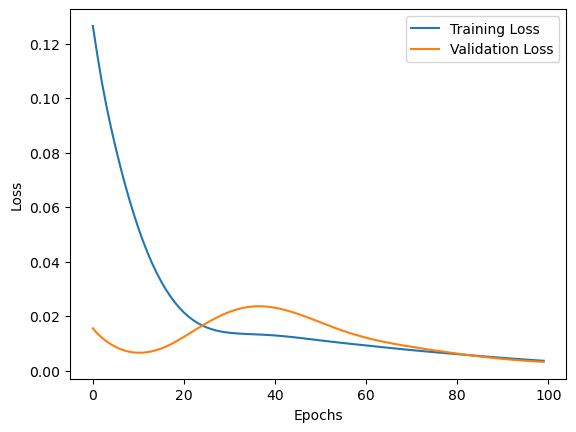

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


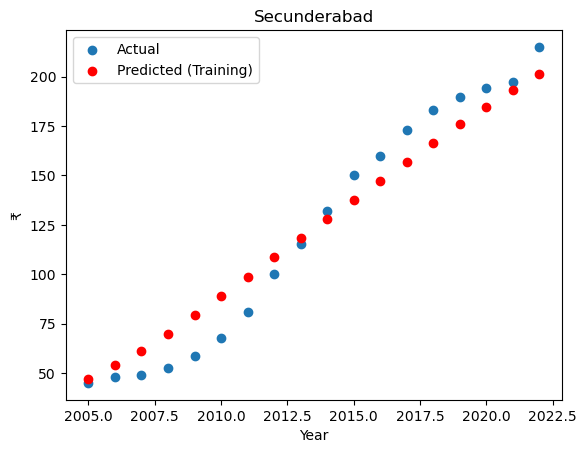

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


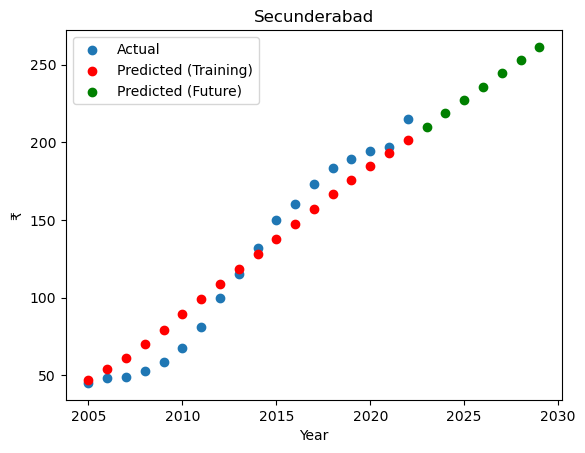

Enter the name of the area:  Secunderabad
Enter the units (per sq ft, per sq meter, per 100 sq meter):  per 100 sq.M


Predicted values:
Year 2023, Predicted Price: ₹210.10per 100 sq.M
Year 2024, Predicted Price: ₹218.66per 100 sq.M
Year 2025, Predicted Price: ₹227.22per 100 sq.M
Year 2026, Predicted Price: ₹235.77per 100 sq.M
Year 2027, Predicted Price: ₹244.33per 100 sq.M
Year 2028, Predicted Price: ₹252.89per 100 sq.M
Year 2029, Predicted Price: ₹261.45per 100 sq.M


In [15]:
import pandas as pd
import tensorflow as tf
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense

# Load the data
filePath = 'Downloads/house.csv'
df = pd.read_csv(filePath)
X = df[['TIME']].values.astype(float)
y = df['Value'].values.astype(float)

# Preprocessing
scalerX = MinMaxScaler()
scalerY = MinMaxScaler()
XScaled = scalerX.fit_transform(X)
YScaled = scalerY.fit_transform(y.reshape(-1, 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(XScaled, YScaled, test_size=0.2, random_state=42)

# Model definition
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

# Model compilation and training
model.compile(optimizer='adam', loss='mean_squared_logarithmic_error')
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)

# Model evaluation
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Visualize training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Prediction and visualization
trainingPredictionsScaled = model.predict(XScaled)
trainingPredictions = scalerY.inverse_transform(trainingPredictionsScaled).flatten()
plt.scatter(df['TIME'], df['Value'].astype(float), label='Actual')
plt.scatter(df['TIME'], trainingPredictions, label='Predicted (Training)', color='red')
plt.xlabel('Year')
plt.ylabel('₹')
plt.title(area_name)
plt.legend()
plt.show()

futureYears = np.arange(2023, 2030).reshape(-1, 1)
futureYearsScaled = scalerX.transform(futureYears)
futureValuesScaled = model.predict(futureYearsScaled)
futureValues = scalerY.inverse_transform(futureValuesScaled).flatten()
plt.scatter(df['TIME'], df['Value'], label='Actual')
plt.scatter(df['TIME'], trainingPredictions, label='Predicted (Training)', color='red')
plt.scatter(futureYears.flatten(), futureValues, label='Predicted (Future)', color='green')
plt.xlabel('Year')
plt.ylabel('₹')
plt.title(area_name)
plt.legend()
plt.show()

# User input
area_name = input("Enter the name of the area: ")
units = input("Enter the units (per sq ft, per sq meter, per 100 sq meter): ")

# Print predicted values
print('Predicted values:')
for year, value in zip(futureYears.flatten(), futureValues):
    formatted_value = "{:.2f}".format(value)
    print(f'Year {year}, Predicted Price: ₹{formatted_value}{units}')